# Class2: 神经网络优化

## Prerequisites

### Setup virtul environment

- `python3.6.9` + `TensorFlow2.3.0` + `sklearn` + `pandas` + `matplotlib`

## 2.1 预备知识

- tf.where(条件语句, 真返回A, 假返回B)
- np.random.RandomState.rand(), 返回一个[0,1)之间的随机数
- np.vstack(),将两个数组按照垂直方向叠加
- np.mgrid[起始值:结束值:步长, 起始值:结束值:步长]; [起始值:结束值)
- .ravel(), 将x变为一维数组，把.前变量拉直
- np.c_[],使得返回的间隔数值点配对

In [ ]:
# p4_where.py

import tensorflow as tf

a = tf.constant([1, 2, 3, 1, 1])
b = tf.constant([0, 1, 3, 4, 5])
c = tf.where(tf.greater(a, b), a, b)  # 若a>b，返回a对应位置的元素，否则返回b对应位置的元素
print("c：", c)

c： tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [ ]:
# p5_RandomState.py

import numpy as np

rdm = np.random.RandomState(seed=1)
a = rdm.rand()      # 返回一个随机标量
b = rdm.rand(2, 3)  # 返回维度为2行3列的随机数矩阵
print("a:", a)
print("b:", b)

a: 0.417022004702574
b: [[7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01]]


In [ ]:
# p6_vstack.py

import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.vstack((a, b))
print("a:\n", a)
print("c:\n", c)

a:
 [1 2 3]
c:
 [[1 2 3]
 [4 5 6]]


In [ ]:
# p7_mgrid.py

import numpy as np
import tensorflow as tf

# 生成等间隔数值点
x, y = np.mgrid[1:3:1, 2:4:0.5]
# 将x, y拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[x.ravel(), y.ravel()]
print("x:\n", x)
print("y:\n", y)
print("x.ravel():\n", x.ravel())
print("y.ravel():\n", y.ravel())
print('grid:\n', grid)

x:
 [[1. 1. 1. 1.]
 [2. 2. 2. 2.]]
y:
 [[2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5]]
x.ravel():
 [1. 1. 1. 1. 2. 2. 2. 2.]
y.ravel():
 [2.  2.5 3.  3.5 2.  2.5 3.  3.5]
grid:
 [[1.  2. ]
 [1.  2.5]
 [1.  3. ]
 [1.  3.5]
 [2.  2. ]
 [2.  2.5]
 [2.  3. ]
 [2.  3.5]]


## 2.2 复杂度学习率
- 神经网络(**NN**)复杂度:多用NN层数和NN参数的个数表示
  - 空间复杂度, 层数 = 隐藏层的层数 + 1个输出层
  - 时间复杂度, 乘加运算次数
- **指数**衰减学习率
  - 初始学习率 * 学习率衰减率 ^ (当前轮数 / 多少轮衰减一次)

In [ ]:
# p10_backpropagation_decaylr.py

import tensorflow as tf

w = tf.Variable(tf.constant(5, dtype=tf.float32))

epoch = 40
LR_BASE = 0.2  # 最初学习率
LR_DECAY = 0.99  # 学习率衰减率
LR_STEP = 1  # 喂入多少轮BATCH_SIZE后，更新一次学习率

for epoch in range(epoch):  # for epoch 定义顶层循环，表示对数据集循环epoch次，此例数据集数据仅有1个w,初始化时候constant赋值为5，循环100次迭代。
    lr = LR_BASE * LR_DECAY ** (epoch / LR_STEP)
    with tf.GradientTape() as tape:  # with结构到grads框起了梯度的计算过程。
        loss = tf.square(w + 1)
    grads = tape.gradient(loss, w)  # .gradient函数告知谁对谁求导

    w.assign_sub(lr * grads)  # .assign_sub 对变量做自减 即：w -= lr*grads 即 w = w - lr*grads
    print("After %s epoch,w is %f,loss is %f,lr is %f" % (epoch, w.numpy(), loss, lr))


After 0 epoch,w is 2.600000,loss is 36.000000,lr is 0.200000
After 1 epoch,w is 1.174400,loss is 12.959999,lr is 0.198000
After 2 epoch,w is 0.321948,loss is 4.728015,lr is 0.196020
After 3 epoch,w is -0.191126,loss is 1.747547,lr is 0.194060
After 4 epoch,w is -0.501926,loss is 0.654277,lr is 0.192119
After 5 epoch,w is -0.691392,loss is 0.248077,lr is 0.190198
After 6 epoch,w is -0.807611,loss is 0.095239,lr is 0.188296
After 7 epoch,w is -0.879339,loss is 0.037014,lr is 0.186413
After 8 epoch,w is -0.923874,loss is 0.014559,lr is 0.184549
After 9 epoch,w is -0.951691,loss is 0.005795,lr is 0.182703
After 10 epoch,w is -0.969167,loss is 0.002334,lr is 0.180876
After 11 epoch,w is -0.980209,loss is 0.000951,lr is 0.179068
After 12 epoch,w is -0.987226,loss is 0.000392,lr is 0.177277
After 13 epoch,w is -0.991710,loss is 0.000163,lr is 0.175504
After 14 epoch,w is -0.994591,loss is 0.000069,lr is 0.173749
After 15 epoch,w is -0.996452,loss is 0.000029,lr is 0.172012
After 16 epoch,w is

## 2.3 激活函数
- 非线性函数
- 大大提升列模型的表达力
- 优秀的激活函数特征
  - 非线性, 多层神经网络可逼近所有函数
  - 可微性, 优化器大多用梯度下降更新参数
  - 单调性, 保证单层网络的损失函数是凸函数
  - 近似恒等性: f(x)≈x, 神经网络更稳定
- Sigmoid函数
  - tf.nn. sigmoid(x)
- Tanh函数
  - tf.math. tanh(x)
- Relu函数,对于初学者首选该函数
  - tf.nn.relu(x)
- Leaky Relu函数
  - tf.nn.leaky_relu(x)
 

## 2.4 损失函数
- 预测值(**y**)与已知答案(**y_**)的差距
- NN 优化的**终极**, **重点**目标, 使得**loss**最小
  - MSE
    - loss_mse = tf.reduce_mean()
  - 自定义
    - tf.reduce_sum(tf.where(tf.greater())
  - CE
    - tf.losses.categorical_crossentropy()
- 案例
  - 预测酸奶日销量y，x1、x2是影响日销量的因素
  - 没有真实数据集，现通过随机生成来拟造

In [ ]:
# p19_mse.py

import tensorflow as tf
import numpy as np

SEED = 23455

rdm = np.random.RandomState(seed=SEED)  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成随机噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)      # 强制转变x数据类型为tf

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))    # 随机初始化参数w1为2行1列

epoch = 15000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)    # 求前向传播计算结果y
        loss_mse = tf.reduce_mean(tf.square(y_ - y))

    grads = tape.gradient(loss_mse, w1)   # loss函数，对待训练参数w1求偏导
    w1.assign_sub(lr * grads)   # 更新参数w1

    if epoch % 500 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

After 0 training steps,w1 is 
[[-0.8096241]
 [ 1.4855157]] 

After 500 training steps,w1 is 
[[-0.21934734]
 [ 1.6984866 ]] 

After 1000 training steps,w1 is 
[[0.08939707]
 [1.673225  ]] 

After 1500 training steps,w1 is 
[[0.2836882]
 [1.5853056]] 

After 2000 training steps,w1 is 
[[0.42324296]
 [1.4906038 ]] 

After 2500 training steps,w1 is 
[[0.531055 ]
 [1.4053345]] 

After 3000 training steps,w1 is 
[[0.61725086]
 [1.3328412 ]] 

After 3500 training steps,w1 is 
[[0.68720096]
 [1.2725208 ]] 

After 4000 training steps,w1 is 
[[0.7443261]
 [1.2227542]] 

After 4500 training steps,w1 is 
[[0.7910986]
 [1.1818361]] 

After 5000 training steps,w1 is 
[[0.8294352]
 [1.1482395]] 

After 5500 training steps,w1 is 
[[0.86087203]
 [1.1206709 ]] 

After 6000 training steps,w1 is 
[[0.8866551]
 [1.098054 ]] 

After 6500 training steps,w1 is 
[[0.9078028]
 [1.0795006]] 

After 7000 training steps,w1 is 
[[0.9251489]
 [1.0642821]] 

After 7500 training steps,w1 is 
[[0.9393773]
 [1.0517985]

In [ ]:
# p20_custom.py

import tensorflow as tf
import numpy as np

SEED = 23455
COST = 1
PROFIT = 99

rdm = np.random.RandomState(SEED)
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epoch = 10000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * COST, (y_ - y) * PROFIT))   # 自定义损失函数

    grads = tape.gradient(loss, w1)
    w1.assign_sub(lr * grads)

    if epoch % 500 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

# 自定义损失函数
# 酸奶成本1元， 酸奶利润99元
# 成本很低，利润很高，人们希望多预测些，生成模型系数大于1，往多了预测

After 0 training steps,w1 is 
[[2.8786578]
 [3.2517848]] 

After 500 training steps,w1 is 
[[1.1460369]
 [1.0672572]] 

After 1000 training steps,w1 is 
[[1.1364173]
 [1.0985414]] 

After 1500 training steps,w1 is 
[[1.1267972]
 [1.1298251]] 

After 2000 training steps,w1 is 
[[1.1758107]
 [1.1724023]] 

After 2500 training steps,w1 is 
[[1.1453722]
 [1.0272155]] 

After 3000 training steps,w1 is 
[[1.1357522]
 [1.0584993]] 

After 3500 training steps,w1 is 
[[1.1261321]
 [1.0897831]] 

After 4000 training steps,w1 is 
[[1.1751455]
 [1.1323601]] 

After 4500 training steps,w1 is 
[[1.1655253]
 [1.1636437]] 

After 5000 training steps,w1 is 
[[1.1350871]
 [1.0184573]] 

After 5500 training steps,w1 is 
[[1.1254673]
 [1.0497413]] 

After 6000 training steps,w1 is 
[[1.1158477]
 [1.0810255]] 

After 6500 training steps,w1 is 
[[1.1062276]
 [1.1123092]] 

After 7000 training steps,w1 is 
[[1.1552413]
 [1.1548865]] 

After 7500 training steps,w1 is 
[[1.1248026]
 [1.0096996]] 

After 8000 t

In [ ]:
# p22_ce.py
# 已知答案y_=(1,0), 预测y1=(0.6, 0.4), y2=(0.8, 0.2)--> y2更准确

import tensorflow as tf

loss_ce1 = tf.losses.categorical_crossentropy([1, 0], [0.6, 0.4])
loss_ce2 = tf.losses.categorical_crossentropy([1, 0], [0.8, 0.2])
print("loss_ce1:", loss_ce1)
print("loss_ce2:", loss_ce2)

# 交叉熵损失函数

loss_ce1: tf.Tensor(0.5108256, shape=(), dtype=float32)
loss_ce2: tf.Tensor(0.22314353, shape=(), dtype=float32)


In [ ]:
# p23_softmaxce.py

# softmax与交叉熵损失函数的结合
import tensorflow as tf
import numpy as np

y_ = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0]])
y = np.array([[12, 3, 2], [3, 10, 1], [1, 2, 5], [4, 6.5, 1.2], [3, 6, 1]])
y_pro = tf.nn.softmax(y)
loss_ce1 = tf.losses.categorical_crossentropy(y_,y_pro)
loss_ce2 = tf.nn.softmax_cross_entropy_with_logits(y_, y)

print('分步计算的结果:\n', loss_ce1)
print('结合计算的结果:\n', loss_ce2)


# 输出的结果相同

分步计算的结果:
 tf.Tensor(
[1.68795487e-04 1.03475622e-03 6.58839038e-02 2.58349207e+00
 5.49852354e-02], shape=(5,), dtype=float64)
结合计算的结果:
 tf.Tensor(
[1.68795487e-04 1.03475622e-03 6.58839038e-02 2.58349207e+00
 5.49852354e-02], shape=(5,), dtype=float64)


## 2.5 缓解过拟合
- 欠拟合, 学习不够彻底
  - 增加输入特征项
  - 增加网络参数
  - 减少正则化参数
- 过拟合, 缺乏泛化力
  - 数据清洗，减少集中噪声
  - 增大训练集
  - 采用正则化
  - 增大正则化参数


### upload the file to sample_data
- `dot.csv`

In [ ]:
%ls

sample_data/


epoch: 0 loss: 3.359421968460083
epoch: 20 loss: 0.14054758846759796
epoch: 40 loss: 0.0627439022064209
epoch: 60 loss: 0.055414676666259766
epoch: 80 loss: 0.05218261480331421
epoch: 100 loss: 0.049857307225465775
epoch: 120 loss: 0.047774478793144226
epoch: 140 loss: 0.04552215337753296
epoch: 160 loss: 0.04336363449692726
epoch: 180 loss: 0.04179024696350098
epoch: 200 loss: 0.040529899299144745
epoch: 220 loss: 0.03829295188188553
epoch: 240 loss: 0.03566500544548035
epoch: 260 loss: 0.03310241922736168
epoch: 280 loss: 0.031065234914422035
epoch: 300 loss: 0.02935774065554142
epoch: 320 loss: 0.02770671807229519
epoch: 340 loss: 0.02633594535291195
epoch: 360 loss: 0.025345345959067345
epoch: 380 loss: 0.024579279124736786
epoch: 400 loss: 0.02422640286386013
epoch: 420 loss: 0.02379726432263851
epoch: 440 loss: 0.02342306822538376
epoch: 460 loss: 0.023213056847453117
epoch: 480 loss: 0.023089075461030006
epoch: 500 loss: 0.023002395406365395
epoch: 520 loss: 0.023047184571623802

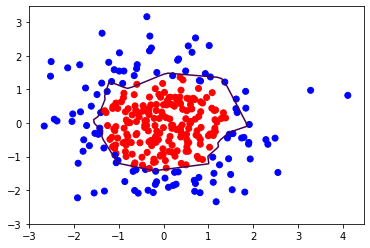

In [ ]:
# p29_regularizationfree.py

# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('./sample_data/dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

x_train = np.vstack(x_data).reshape(-1, 2)
y_train = np.vstack(y_data).reshape(-1, 1)

Y_c = [['red' if y else 'blue'] for y in y_train]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元(数字11是作者随便选的隐藏层神经元个数)，1层隐藏层，输出层为1个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.005  # 学习率
epoch = 800  # 循环轮数

# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss = tf.reduce_mean(tf.square(y_train - y))

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad tape.gradient是自动求导结果与[w1, b1, w2, b2] 索引为0，1，2，3 
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx , yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_test in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_test], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c))  # squeeze去掉纬度是1的纬度,相当于去掉[['red'],[''blue]],内层括号变为['red','blue']
# 把坐标xx yy和对应的值probs放入contour函数，给probs值为0.5的所有点上色  plt.show()后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

# 读入红蓝点，画出分割线，不包含正则化
# 不清楚的数据，建议print出来查看

epoch: 0 loss: 4.62708044052124
epoch: 20 loss: 0.6793822050094604
epoch: 40 loss: 0.6112563610076904
epoch: 60 loss: 0.5640512704849243
epoch: 80 loss: 0.5263250470161438
epoch: 100 loss: 0.49437621235847473
epoch: 120 loss: 0.4656562805175781
epoch: 140 loss: 0.43941962718963623
epoch: 160 loss: 0.41513344645500183
epoch: 180 loss: 0.39242789149284363
epoch: 200 loss: 0.3710271716117859
epoch: 220 loss: 0.3511165678501129
epoch: 240 loss: 0.332616925239563
epoch: 260 loss: 0.31543758511543274
epoch: 280 loss: 0.2993297576904297
epoch: 300 loss: 0.28413155674934387
epoch: 320 loss: 0.26965054869651794
epoch: 340 loss: 0.2561817467212677
epoch: 360 loss: 0.24375618994235992
epoch: 380 loss: 0.23206184804439545
epoch: 400 loss: 0.2212413251399994
epoch: 420 loss: 0.21108479797840118
epoch: 440 loss: 0.20160576701164246
epoch: 460 loss: 0.19277164340019226
epoch: 480 loss: 0.18442083895206451
epoch: 500 loss: 0.17665664851665497
epoch: 520 loss: 0.16934287548065186
epoch: 540 loss: 0.162

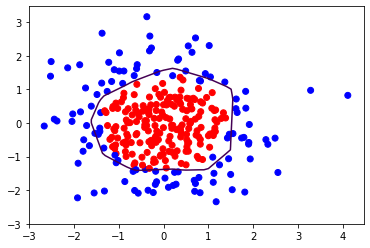

In [ ]:
# p29_regularizationcontain.py
# 相比P28, 添加l2正则化

# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('./sample_data/dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

x_train = x_data
y_train = y_data.reshape(-1, 1)

Y_c = [['red' if y else 'blue'] for y in y_train]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元(数字11是作者随便选的隐藏层神经元个数)，2层隐藏层，输出层为1个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.005  # 学习率
epoch = 800  # 循环轮数

# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_mse = tf.reduce_mean(tf.square(y_train - y))
            # 添加l2正则化
            loss_regularization = []
            # tf.nn.l2_loss(w)=sum(w ** 2) / 2
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            # 求和
            # 例：x=tf.constant(([1,1,1],[1,1,1]))
            #   tf.reduce_sum(x)
            # >>>6
            loss_regularization = tf.reduce_sum(loss_regularization)
            loss = loss_mse + 0.03 * loss_regularization  # REGULARIZER = 0.03

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx, yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_predict in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_predict], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c))
# 把坐标xx yy和对应的值probs放入contour函数，给probs值为0.5的所有点上色  plt.show()后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

# 读入红蓝点，画出分割线，包含正则化
# 不清楚的数据，建议print出来查看

## 2.6 优化器
- 待优化参数𝒘, 损失函数loss, 学习率𝒍r, 每次迭代一个batch(2^n), t表示当前batch迭代的总次数.
  - 一阶动量:与梯度相关的函数
  - 二阶动量:与梯度平方相关的函数
- 优化器
  - SGD(无momentum), 常用的梯度下降法
  - SGDM(含momentum的SGD), 在SGD基础上增加一阶动量
  - Adagrad，在SGD基础上增加二阶动量
  - RMSProp，SGD基础上增加二阶动量
  - Adam, 同时结合SGDM一阶动量和RMSProp二阶动量

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614023566246
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570250928401947
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399094939232
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942265003919601
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873637914657593
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299792528152
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875866293907
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107673197984695
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404683724045753
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802725985646248
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

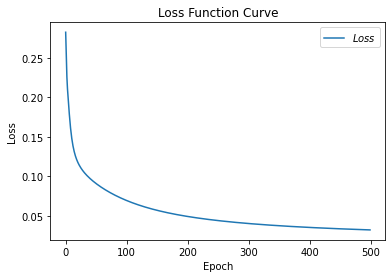

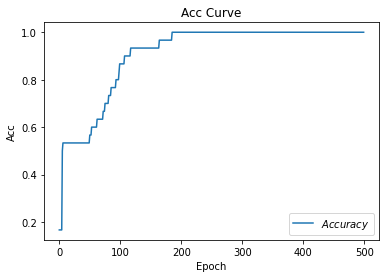

In [ ]:
# p32_sgd.py

# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 本文件较 class1\p45_iris.py 仅添加四处时间记录  用 ##n## 标识
# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况

Epoch 0, loss: 0.2961867228150368
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.28081152215600014
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.26392313465476036
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.241925410926342
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.2185598537325859
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.20465287193655968
Test_acc: 0.16666666666666666
--------------------------
Epoch 6, loss: 0.1955692134797573
Test_acc: 0.16666666666666666
--------------------------
Epoch 7, loss: 0.18339980021119118
Test_acc: 0.5
--------------------------
Epoch 8, loss: 0.17289478331804276
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.1638195775449276
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.1557205729186535
Test_acc: 0.5333333333333333
--------------------------
Epoch 11, los

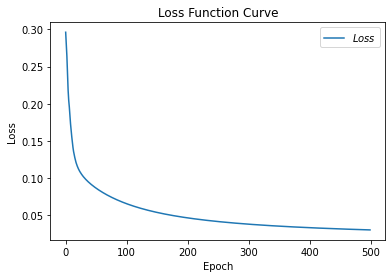

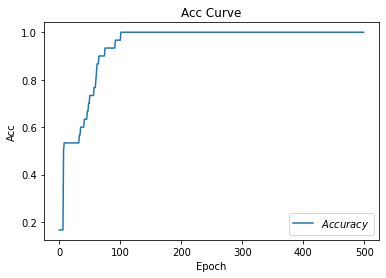

In [ ]:
# p34_sgdm.py

# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
m_w, m_b = 0, 0
beta = 0.9
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # sgd-momentun  
        m_w = beta * m_w + (1 - beta) * grads[0]
        m_b = beta * m_b + (1 - beta) * grads[1]
        w1.assign_sub(lr * m_w)
        b1.assign_sub(lr * m_b)
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况

Epoch 0, loss: 0.2528788596391678
Test_acc: 0.5333333333333333
--------------------------
Epoch 1, loss: 0.17821525782346725
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.15621443092823029
Test_acc: 0.5333333333333333
--------------------------
Epoch 3, loss: 0.1420477293431759
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.13362513855099678
Test_acc: 0.5333333333333333
--------------------------
Epoch 5, loss: 0.12754760682582855
Test_acc: 0.5333333333333333
--------------------------
Epoch 6, loss: 0.12286805920302868
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.11908590793609619
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.1159136202186346
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.11317718215286732
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.11076570861041546
Test_acc: 0.5333333333333333
--------------------------
E

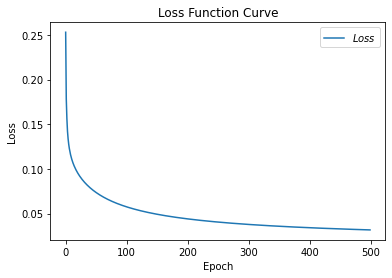

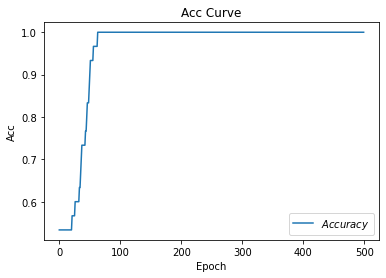

In [ ]:
# p36_adagrad.py

# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
v_w, v_b = 0, 0
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # adagrad
        v_w += tf.square(grads[0])
        v_b += tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
        b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况

Epoch 0, loss: 0.392601415514946
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.20467259176075459
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.17201907187700272
Test_acc: 0.5333333333333333
--------------------------
Epoch 3, loss: 0.15918354131281376
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.15706952288746834
Test_acc: 0.5333333333333333
--------------------------
Epoch 5, loss: 0.21631581708788872
Test_acc: 0.5333333333333333
--------------------------
Epoch 6, loss: 0.14704442024230957
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.18439018353819847
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.13945917785167694
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.19464711099863052
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.17245551943778992
Test_acc: 0.5333333333333333
--------------------------

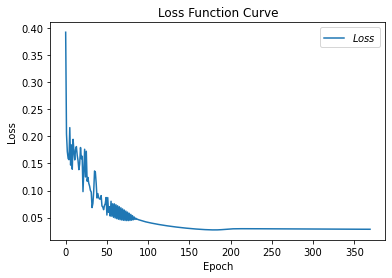

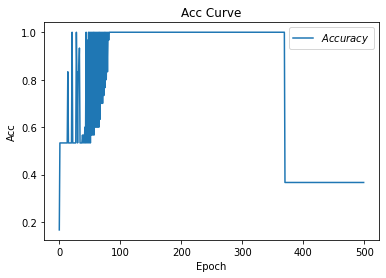

In [ ]:
# p38_rmsprop.py

# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
v_w, v_b = 0, 0
beta = 0.9
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        ##########################################################################
        # rmsprop
        v_w = beta * v_w + (1 - beta) * tf.square(grads[0])
        v_b = beta * v_b + (1 - beta) * tf.square(grads[1])
        w1.assign_sub(lr * grads[0] / tf.sqrt(v_w))
        b1.assign_sub(lr * grads[1] / tf.sqrt(v_b))
    ##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况

Epoch 0, loss: 0.21984169632196426
Test_acc: 0.5333333333333333
--------------------------
Epoch 1, loss: 0.14480622299015522
Test_acc: 0.5333333333333333
--------------------------
Epoch 2, loss: 0.10274341888725758
Test_acc: 0.6666666666666666
--------------------------
Epoch 3, loss: 0.08922167494893074
Test_acc: 0.5333333333333333
--------------------------
Epoch 4, loss: 0.0860079163685441
Test_acc: 0.9
--------------------------
Epoch 5, loss: 0.06994976568967104
Test_acc: 0.8
--------------------------
Epoch 6, loss: 0.06724478863179684
Test_acc: 0.8
--------------------------
Epoch 7, loss: 0.061045446433126926
Test_acc: 1.0
--------------------------
Epoch 8, loss: 0.05573806166648865
Test_acc: 0.9333333333333333
--------------------------
Epoch 9, loss: 0.054052925668656826
Test_acc: 1.0
--------------------------
Epoch 10, loss: 0.0490919379517436
Test_acc: 1.0
--------------------------
Epoch 11, loss: 0.048258728347718716
Test_acc: 1.0
--------------------------
Epoch 12, 

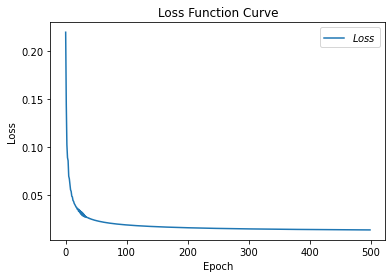

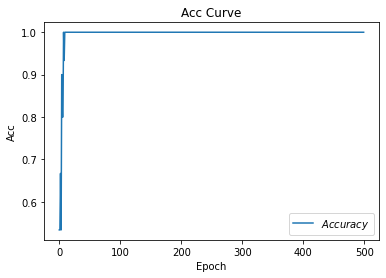

In [ ]:
# p40_adam.py

# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
m_w, m_b = 0, 0
v_w, v_b = 0, 0
beta1, beta2 = 0.9, 0.999
delta_w, delta_b = 0, 0
global_step = 0
##########################################################################

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
 ##########################################################################       
        global_step += 1
 ##########################################################################       
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

##########################################################################
 # adam
        m_w = beta1 * m_w + (1 - beta1) * grads[0]
        m_b = beta1 * m_b + (1 - beta1) * grads[1]
        v_w = beta2 * v_w + (1 - beta2) * tf.square(grads[0])
        v_b = beta2 * v_b + (1 - beta2) * tf.square(grads[1])

        m_w_correction = m_w / (1 - tf.pow(beta1, int(global_step)))
        m_b_correction = m_b / (1 - tf.pow(beta1, int(global_step)))
        v_w_correction = v_w / (1 - tf.pow(beta2, int(global_step)))
        v_b_correction = v_b / (1 - tf.pow(beta2, int(global_step)))

        w1.assign_sub(lr * m_w_correction / tf.sqrt(v_w_correction))
        b1.assign_sub(lr * m_b_correction / tf.sqrt(v_b_correction))
##########################################################################

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况